# Getting Global Warming Rates

Easier to do this with xarray than in R. Objective is simple, process full global timeline to table of global temperature and anomalies. Use that table to get global warming rates for the temperature report.

In [4]:
# Libraries
import requests
import os
import xarray as xr
import datetime
import numpy as np
import pandas as pd
import oisstools as ot

# Set the workspace - local/ docker
box_root = ot.set_workspace("local")

# Set the climatology period
reference_period = "1982-2011"

# Set climatology source choices
climatologies = {"1982-2011" : "1982to2011_climatology",
                 "1991-2020" : "1991to2020_climatology"}

climate_period = climatologies[reference_period]

# document what choices were made on last run:
print(f"Working via {workspace} directory at: {box_root}")
print(f"Calculating Anomalies for {reference_period} reference period using {climate_period}")

Working via local directory at: /Users/akemberling/Box/
Calculating Anomalies for 1982-2011 reference period using 1982to2011_climatology


## Load Global OISST Anomalies

In [6]:
start_yr = 1981
end_yr   = 2021

# Load OISSt using ot.load_box_oisst()
oisst_anomalies = ot.load_box_oisst(box_root, 
                               start_yr, 
                               end_yr, 
                               anomalies = True, 
                               do_parallel = True)
oisst_anomalies

<xarray.Dataset>
Dimensions:               (lat: 720, lon: 1440, time: 14546)
Coordinates:
  * lon                   (lon) float32 0.125 0.375 0.625 ... 359.625 359.875
  * lat                   (lat) float32 -89.875 -89.625 ... 89.625 89.875
  * time                  (time) datetime64[ns] 1981-09-01 ... 2021-06-28T12:00:00
    MOD                   (time) int64 dask.array<chunksize=(122,), meta=np.ndarray>
    modified_ordinal_day  (time) int64 dask.array<chunksize=(122,), meta=np.ndarray>
Data variables:
    sst                   (time, lat, lon) float32 dask.array<chunksize=(122, 720, 1440), meta=np.ndarray>
Attributes:
    title:          Sea surface temperature anomalies from NOAA OISSTv2 SST D...
    institution:    Gulf of Maine Research Institute
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    comment:        Climatology used represents mean SST for the years 1982-2011
    history:        Anomalies calculated 3/9/2021
    references:     https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oiss...
    dataset_title:  Sea Surface Temperature Anomalies - OISSTv2

## Get Mean Time Series

Pretty simple once the data is loaded to get the mean temperature or temperature anomaly across the lat lon dimensions:

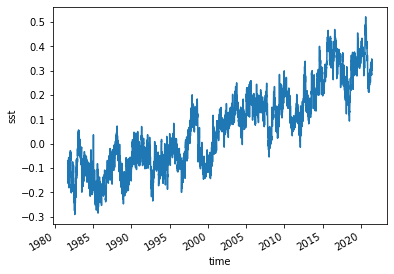

In [7]:
# Timeline for global anomalies
# wonderful tool to calculate spatial mean by using dim variable names
mean_anomalies = oisst_anomalies.mean(['lat', 'lon']) 
mean_anomalies.sst.plot()


In [8]:
# convert anomalies to a dataframe from xr.array
anom_df = mean_anomalies.sst.to_dataframe()
anom_df.tail()

,MOD,modified_ordinal_day,sst
time,,,
1981-09-01,245,245,-0.069423
1981-09-02,246,246,-0.082091
1981-09-03,247,247,-0.085882
1981-09-04,248,248,-0.092171
1981-09-05,249,249,-0.102719


In [10]:
# SAVING
anom_df.to_csv(f"{box_root}Res_Data/OISST/oisst_mainstays/global_timeseries/global_anoms_1982to2011.csv")